# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *Yitian Chen* 
* *matr. nr.* 
* *study program*
* *B.Sc./M.Sc.*

*of all assignment group participants here.* (double klick here to edit)*

In [2]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()


## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


==> There are 13 Attributes as input features for each instance,
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline

The calssification target is the 1st attribute: , which classifies current wine belongs to which cultivars(There are 3 cultivars). In dataset it is stored as y, with data equals 0 or 1 or 2.


2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [8]:
# Implement your solution here.
#here goes the Number of whole set
NumberOfSamples = X.shape[0]
print("Number of Samples:",NumberOfSamples)

#here goes the number of each class
NumberOfClass0 = y[y == 0].size
NumberOfClass1 = y[y == 1].size
NumberOfClass2 = y[y == 2].size
for i in range(0,3):
    print("Number of class",i,"is:", y[y == i].size)
    
#here goes the mean and std of each attributes
featureMean = np.mean(X, axis = 0) 
featureSTD  = np.std(X, axis = 0)
for i in range(13):
    print("Mean of attribute ",i,"is :",featureMean[i] )
    print("STD of attribute ",i,"is :",featureSTD[i] )


Number of Samples: 178
Number of class 0 is: 59
Number of class 1 is: 71
Number of class 2 is: 48
Mean of attribute  0 is : 13.000617977528083
STD of attribute  0 is : 0.809542914528517
Mean of attribute  1 is : 2.336348314606741
STD of attribute  1 is : 1.1140036269797895
Mean of attribute  2 is : 2.3665168539325854
STD of attribute  2 is : 0.2735722944264325
Mean of attribute  3 is : 19.49494382022472
STD of attribute  3 is : 3.330169757658213
Mean of attribute  4 is : 99.74157303370787
STD of attribute  4 is : 14.242307673359807
Mean of attribute  5 is : 2.295112359550562
STD of attribute  5 is : 0.6240905641965366
Mean of attribute  6 is : 2.0292696629213474
STD of attribute  6 is : 0.9960489503792328
Mean of attribute  7 is : 0.36185393258426973
STD of attribute  7 is : 0.12410325988364797
Mean of attribute  8 is : 1.5908988764044953
STD of attribute  8 is : 0.5707488486199377
Mean of attribute  9 is : 5.058089882022473
STD of attribute  9 is : 2.3117646609525573
Mean of attribute

3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

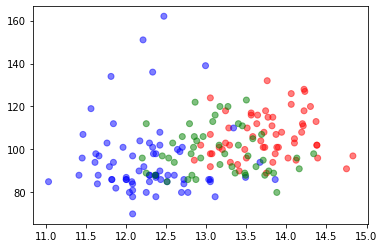

In [9]:
# Implement your solution here.
###plotting
merged_set = np.column_stack([y,X])
Alcohol_set = merged_set[:,1]
Magnesium_set = merged_set[:,5] 
color = []
for i in merged_set[:,0]:
    if i == 0:
        color.append("red")
    if i == 1:  
        color.append("blue")
    if i == 2:
        color.append("green")
plt.scatter(Alcohol_set, Magnesium_set, c=color, alpha=0.5)
  

4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [4]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    return None, None, None, None

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

AttributeError: 'NoneType' object has no attribute 'shape'

5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [ ]:
# Implement your solution here

## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [ ]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        pass
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [ ]:
def precision(y_pred, y_true):
    # Implement your solution here.

def recall(y_pred, y_true):
    # Implement your solution here.

def f1score(y_pred, y_true):
    # Implement your solution here.

2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [ ]:
# Implement your solution here.

==> *Write your observations here and report your results.* (double klick here to edit)

3) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

==> *Write your response here.* (double klick here to edit)